<h1>Mineração de Dados do Mercado de Ações</h1>


<h2>Metodologia</h2>

<img src="https://github.com/leonardosminfo/Stock/blob/master/daaminingfinal.png?raw=true">

<h2>Definições</h2>

<b> Ações </b> são títulos de renda variável que equivalem à menor unidade resultante da divisão do capital da empresa.

<b>Análise técnica </b> é a avaliação comportamento dos preços dos ativos com a possibilidade de identificação de  pontos de compra e de venda.

<b> Indicador </b> é a representação gráfica de uma fórmula matemática, utilizando como dados de entrada o preço , o volume , composição de indicadores, ou os três ao mesmo tempo.

<b> Tendência </b> corresponde à direção e o sentido do movimento de altos e baixos que a ação percorre. Por exemplo, uma tendência de alta é uma série de altos e baixos cada vez mais altos, enquanto uma tendência de baixa é uma série de pontos altos e baixos cada vez mais baixos.

<h2> Objetivo </h2>
Esta anotação tem a intenção de demonstrar e explicar o código e os métodos utilizados pesquisa realizada a respeito de mineração de tendências em ações.

<h2>Base de Dados</h2>

A obtenção dos valores das ações por período utilizado nesta pesquisa foi obtido através do <i>Google Finances</i>. 



<h2>Função para o carregamento de bibliotecas</h2>

In [9]:
loadlibrary <- function(x)
{
  if (!require(x,character.only = TRUE))
  {
    install.packages(x, repos='http://cran.us.r-project.org', dep=TRUE)
    if(!require(x,character.only = TRUE)) stop("Package not found")
  }
}

Serão utilizadas as seguintes biblotecas:
<ul>
        <li><b>ggplot</b>:criação de gráficos estatísticos</li>
    <li><b>quantmod</b>: pacote projetado para ajudar na análise quantitativa, desenvolvimento de testes e implantação de modelos de negócios com base estatística</li>
    <li><b>corrplot</b>:  representação gráfica da matriz de correlação e intervalo de confiança. labels, layout, etc</li>
    <li><b>cubist</b>: modelo de regressão</li>
    <li><b>caret</b>: conjunto de funções para criação e manipulação de modelos preditivos</li>
        </ul>


In [57]:
loadlibrary("ggplot2")
loadlibrary("quantmod")
loadlibrary("corrplot")
loadlibrary("Cubist")
loadlibrary("caret")

Loading required package: caret


<h2>Aquisição dos valores da variável temporal da ação</h2>

Exemplo - Ação da Apple

In [43]:
getSymbols("AAPL",src="google")
head(AAPL)

[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume
2007-01-03     12.33     12.37    11.70      11.97   311433248
2007-01-04     12.01     12.28    11.97      12.24   214031636
2007-01-05     12.25     12.31    12.06      12.15   208817119
2007-01-08     12.28     12.36    12.18      12.21   199431337
2007-01-09     12.35     13.28    12.16      13.22   838036682
2007-01-10     13.54     13.97    13.35      13.86   739605951

<h2>Pré- Processamento</h2>

Inicialmente foi utilizada a Composição de Atributos, adicionar os índices ATR,ADX,Aroon,SMI,Bollinger,SAR,ROC,RSI, OBV e EMA à  base de dados, levando em consideração vinte períodos de aquisição. Logo após foi realizada a limpeza dos dados, com a retirada dos itens com algum atributo nulo. Em seguida ocorreu a redução da dimensionalidade, levando em consideração a correlação das colunas.

Técnicas :
<ul>
<li>Composição de Atributos – Adição de novos atributos inferidos a partir de atributos existentes (Indicadores Técnicos)</li>
<li>Limpeza de Dados – Dados Incompletos (NA)</li>
<li>Redução da Dimensionalidade – Seleção de Atributos</li>
</ul>

<h3>Composição de Atributos</h3>

In [44]:

## Average True Range Indicator
ATRindicador <- ATR(AAPL, n = 20)

## Weilders Directional Index

ADXIndicador <- ADX(AAPL, n = 20)

## Aroon Indicador
AroonIndicador <- aroon(AAPL[, 2:3], n = 20)

## Stochastic Momentum Indicador
SMIindicador <- SMI(AAPL[, 2:4], n = 20, nFast = 20, nSlow = 11,
                    nSig = 6, maType = SMA,
                    bounded = TRUE)

## Bollinger Bands Indicador
BBandIndicador <- BBands(AAPL[, 2:4],n=20)
# SMA
SMAIndicador <- SMA(AAPL[,4], n = 20)

## MACD
MACDindicador <- MACD(AAPL[,4],nFast = 20, nSlow =11 , nSig = 6)

## SAR
sarindicador <- SAR(AAPL[,2:3], accel = c(0.02, 0.2))

## Rate of change
roc <- ROC(AAPL[,5], n = 20, type = c("continuous", "discrete"),
           na.pad = TRUE)

## Relative strenght index
rsi <- RSI(AAPL[,5], n = 20, maType = "WMA")


##OBV On Balance Volume
obv <- OBV(AAPL[,4],AAPL[,5])
## EMA
EMAIndicador <- EMA(AAPL[,4], n = 20)

#Completando a composição, adicionando uma variável os valores

cAAPL <- cbind(AAPL,ADXIndicador,BBandIndicador,EMAIndicador,MACDindicador,rsi,SMAIndicador,obv)

<h3>Resultado da Composição dos atributos</h3>

In [45]:
head(cAAPL,30)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume      DIp
2007-01-03     12.33     12.37    11.70      11.97   311433248       NA
2007-01-04     12.01     12.28    11.97      12.24   214031636       NA
2007-01-05     12.25     12.31    12.06      12.15   208817119       NA
2007-01-08     12.28     12.36    12.18      12.21   199431337       NA
2007-01-09     12.35     13.28    12.16      13.22   838036682       NA
2007-01-10     13.54     13.97    13.35      13.86   739605951       NA
2007-01-11     13.71     13.83    13.59      13.69   360565688       NA
2007-01-12     13.51     13.58    13.32      13.52   328246485       NA
2007-01-16     13.67     13.89    13.64      13.87   311365418       NA
2007-01-17     13.94     13.94    13.55      13.56   420187362       NA
2007-01-18     13.16     13.16    12.72      12.72   591823435       NA
2007-01-19     12.66     12.81    12.59      12.64   341178439       NA
2007-01-22     12.73     12.74    12.24      12.40   363643399  

Após a composição, foram realizados ajustes para facilitação da manipulação dos dados

In [46]:

#Transformando em DataFrame para facilictar a manipulacao
cdfAAPL<-as.data.frame(cAAPL)


#Criando a matriz da Ação a ser Analisada, retirando a indexação pelo atributo data(xts)
AAPLBD<-data.frame(date = index(cdfAAPL),cdfAAPL, row.names=NULL)


#Atribuindo nome as colunas
colnames(AAPLBD)<-c("Date","OpenPrice","HighPrice","LowPrice","ClosePrice","Volume","+dirInd","-dirInd","dirind","ADX","dnBB","MaAvg","UpBB","pctB","EMA","MACD","MACDsignal","RSI","SMA","OBV")



<h3>Limpeza dos dados</h3>

In [47]:
#Retirando a Coluna da Data
dadoLimpo<-AAPLBD[,-c(1)]

#retirando as linhas com valor nulo, provenientes das composi??es de atributos
dadoLimpo<-dadoLimpo[-c(1:50),]

In [48]:
head(dadoLimpo,30)

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,+dirInd,-dirInd,dirind,ADX,dnBB,MaAvg,UpBB,pctB,EMA,MACD,MACDsignal,RSI,SMA,OBV
51,12.79,12.86,12.76,12.80,142940707,58.21453,28.93825,33.591902,20.43897,12.03229,12.53017,13.02804,0.777678687,12.56722,-0.68144857,-0.49476784,45.51297,12.5275,514492335
52,12.89,13.08,12.80,13.02,178300199,58.91860,27.84920,35.807519,21.20740,12.07354,12.57167,13.06979,0.896484752,12.61034,-0.81951094,-0.58755159,48.79545,12.5725,692792534
53,13.05,13.12,13.01,13.07,122318448,59.27830,25.87780,39.222683,22.10816,12.10314,12.61500,13.12686,0.941203797,12.65412,-0.93679053,-0.68733414,42.41155,12.6125,815110982
54,13.14,13.43,13.09,13.41,171861921,59.64955,24.91250,41.078769,23.05669,12.05593,12.65050,13.24507,1.054599903,12.72611,-1.19342645,-0.83193194,47.82387,12.6460,986972903
55,13.39,13.48,13.29,13.42,141322034,61.61729,22.84267,45.908874,24.19930,12.00439,12.68017,13.35595,1.030128695,12.79219,-1.36976446,-0.98559838,44.89932,12.6775,1128294937
56,13.34,13.44,13.33,13.36,112838579,60.73205,23.66384,43.921829,25.18543,11.96984,12.71033,13.45082,0.949927891,12.84627,-1.44692352,-1.11740556,41.61834,12.7095,1015456358
57,13.43,13.70,13.33,13.69,216414128,61.59130,22.96912,45.674063,26.20986,11.92487,12.75500,13.58513,0.992895575,12.92662,-1.65426047,-1.27079268,53.66339,12.7610,1231870486
58,13.67,13.83,13.57,13.64,233172905,62.44672,20.78522,50.054708,27.40210,11.96466,12.83317,13.70167,0.987522482,12.99457,-1.75518135,-1.40918944,55.52323,12.8435,998697581
59,13.55,13.63,13.31,13.32,237348986,62.44672,26.67252,40.141958,28.03909,12.07344,12.90117,13.72889,0.813409932,13.02556,-1.63647291,-1.47412758,56.98375,12.9050,761348595
60,13.46,13.46,13.18,13.39,181498436,59.67319,30.52150,32.320853,28.25318,12.14438,12.95133,13.75829,0.742887795,13.06027,-1.55741049,-1.49792270,49.86277,12.9525,942847031


<h3>Redução da Dimensionalidade</h3>

In [58]:
correlacoes <- cor(dadoLimpo)
altacorrelacao<-findCorrelation(correlacoes, cutoff = 0.70)


Colunas com Alta Correlação

In [61]:
names(dadoLimpo[,altacorrelacao])

[1] "LowPrice"   "ClosePrice" "OpenPrice"  "HighPrice"  "MaAvg"     
 [6] "UpBB"       "dnBB"       "EMA"        "OBV"        "-dirInd"   
[11] "MACD"

Após a identificação das colunas, a dimensionalidade é reduzida

In [67]:
cdadoLimpo<-dadoLimpo[,-altacorrelacao]

cmLimpa <- cor(cdadoLimpo)

In [63]:
head(cdadoLimpo,20)

,Volume,+dirInd,dirind,ADX,pctB,MACDsignal,RSI,SMA
51,142940707,58.21453,33.591902,20.43897,0.77767869,-0.4947678,45.51297,12.5275
52,178300199,58.91860,35.807519,21.20740,0.89648475,-0.5875516,48.79545,12.5725
53,122318448,59.27830,39.222683,22.10816,0.94120380,-0.6873341,42.41155,12.6125
54,171861921,59.64955,41.078769,23.05669,1.05459990,-0.8319319,47.82387,12.6460
55,141322034,61.61729,45.908874,24.19930,1.03012869,-0.9855984,44.89932,12.6775
56,112838579,60.73205,43.921829,25.18543,0.94992789,-1.1174056,41.61834,12.7095
57,216414128,61.59130,45.674063,26.20986,0.99289558,-1.2707927,53.66339,12.7610
58,233172905,62.44672,50.054708,27.40210,0.98752248,-1.4091894,55.52323,12.8435
59,237348986,62.44672,40.141958,28.03909,0.81340993,-1.4741276,56.98375,12.9050
60,181498436,59.67319,32.320853,28.25318,0.74288780,-1.4979227,49.86277,12.9525


<h3>Adicionado o tempo de volta, após pré-processamento</h3>

In [75]:

#adicionando o tempo de volta aos dados
ctdadoLimpo<-data.frame(date = index(AAPL[51:2665,]),AAPL[51:2665,4],cdadoLimpo[1:2615,], row.names=NULL)

#renomeando as colunas
colnames(ctdadoLimpo)<-c("Date","ClosePrice",names(cdadoLimpo))


In [77]:
head(ctdadoLimpo,20)


Date,ClosePrice,Volume,+dirInd,dirind,ADX,pctB,MACDsignal,RSI,SMA
2007-03-16,12.80,142940707,58.21453,33.591902,20.43897,0.77767869,-0.4947678,45.51297,12.5275
2007-03-19,13.02,178300199,58.91860,35.807519,21.20740,0.89648475,-0.5875516,48.79545,12.5725
2007-03-20,13.07,122318448,59.27830,39.222683,22.10816,0.94120380,-0.6873341,42.41155,12.6125
2007-03-21,13.41,171861921,59.64955,41.078769,23.05669,1.05459990,-0.8319319,47.82387,12.6460
2007-03-22,13.42,141322034,61.61729,45.908874,24.19930,1.03012869,-0.9855984,44.89932,12.6775
2007-03-23,13.36,112838579,60.73205,43.921829,25.18543,0.94992789,-1.1174056,41.61834,12.7095
2007-03-26,13.69,216414128,61.59130,45.674063,26.20986,0.99289558,-1.2707927,53.66339,12.7610
2007-03-27,13.64,233172905,62.44672,50.054708,27.40210,0.98752248,-1.4091894,55.52323,12.8435
2007-03-28,13.32,237348986,62.44672,40.141958,28.03909,0.81340993,-1.4741276,56.98375,12.9050
2007-03-29,13.39,181498436,59.67319,32.320853,28.25318,0.74288780,-1.4979227,49.86277,12.9525


<h2>Análise Exploratória</h2>

Conjunto de dados sequenciais: série temporal
Atributos quantitativos.

Técnicas :
<ul>
<li>Histograma</li>
<li>Correlação dos Dados</li>
<li>Dispersão</li>
</ul>

<h3>Comportamento dos 20 primeiros meses da ação</h3>

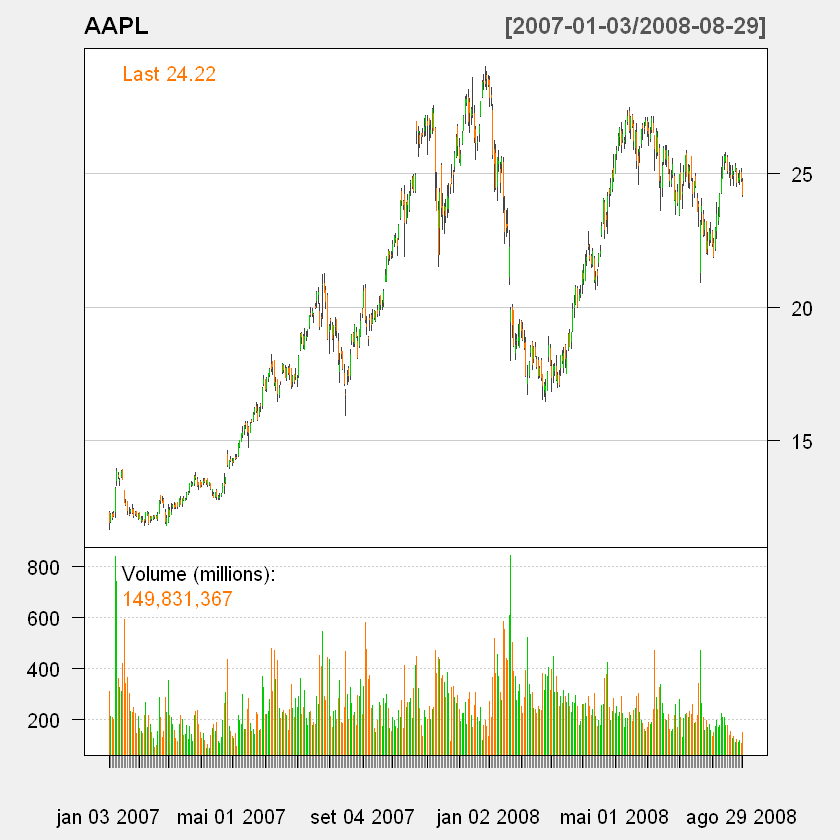

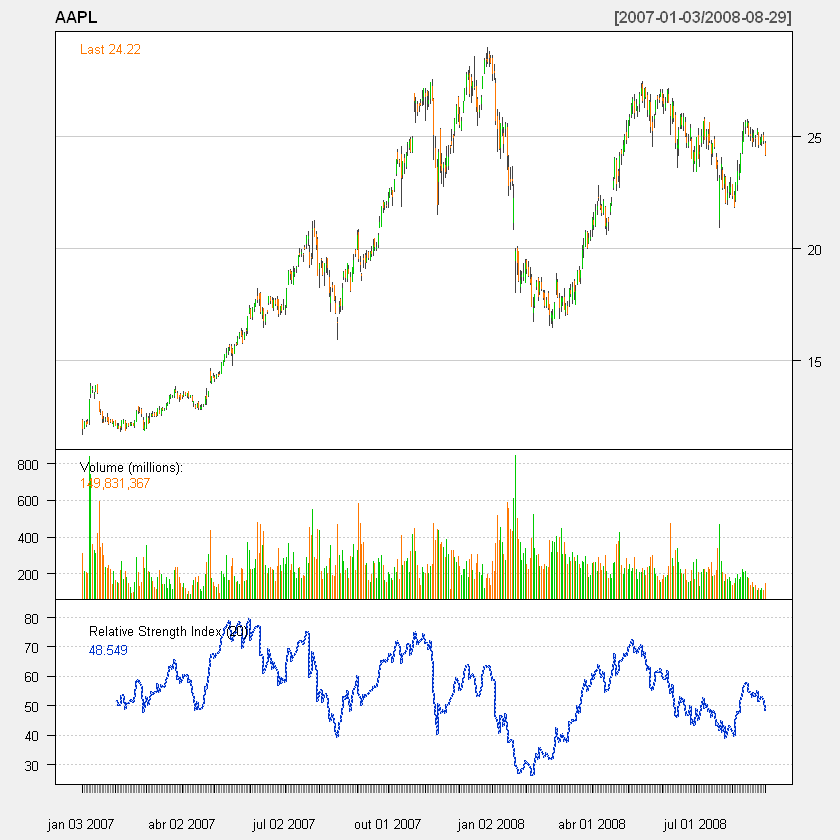

In [36]:
chartSeries(AAPL,theme = chartTheme("white"),subset = "first 20 months") 
addRSI(n=20)


<h3>Sumário dos Dados</h3>

In [32]:
summary(AAPLBD)

      Date        OpenPrice        HighPrice         LowPrice     
 Min.   :   1   Min.   : 11.34   Min.   : 11.71   Min.   : 11.17  
 1st Qu.: 671   1st Qu.: 26.84   1st Qu.: 27.13   1st Qu.: 26.43  
 Median :1341   Median : 62.57   Median : 63.38   Median : 61.90  
 Mean   :1341   Mean   : 66.53   Mean   : 67.14   Mean   : 65.87  
 3rd Qu.:2011   3rd Qu.: 99.02   3rd Qu.:100.13   3rd Qu.: 98.31  
 Max.   :2681   Max.   :161.94   Max.   :162.51   Max.   :160.15  
                                                                  
   ClosePrice         Volume             +dirInd         -dirInd      
 Min.   : 11.17   Min.   : 11475922   Min.   :28.00   Min.   : 8.603  
 1st Qu.: 26.78   1st Qu.: 53002026   1st Qu.:49.20   1st Qu.:25.037  
 Median : 62.70   Median :100869587   Median :55.08   Median :33.593  
 Mean   : 66.52   Mean   :126639404   Mean   :54.46   Mean   :35.389  
 3rd Qu.: 99.18   3rd Qu.:168776993   3rd Qu.:59.79   3rd Qu.:43.647  
 Max.   :161.60   Max.   :843264044   

<h3>Histograma da Distribuição dos Preços de Fechamento</h3>

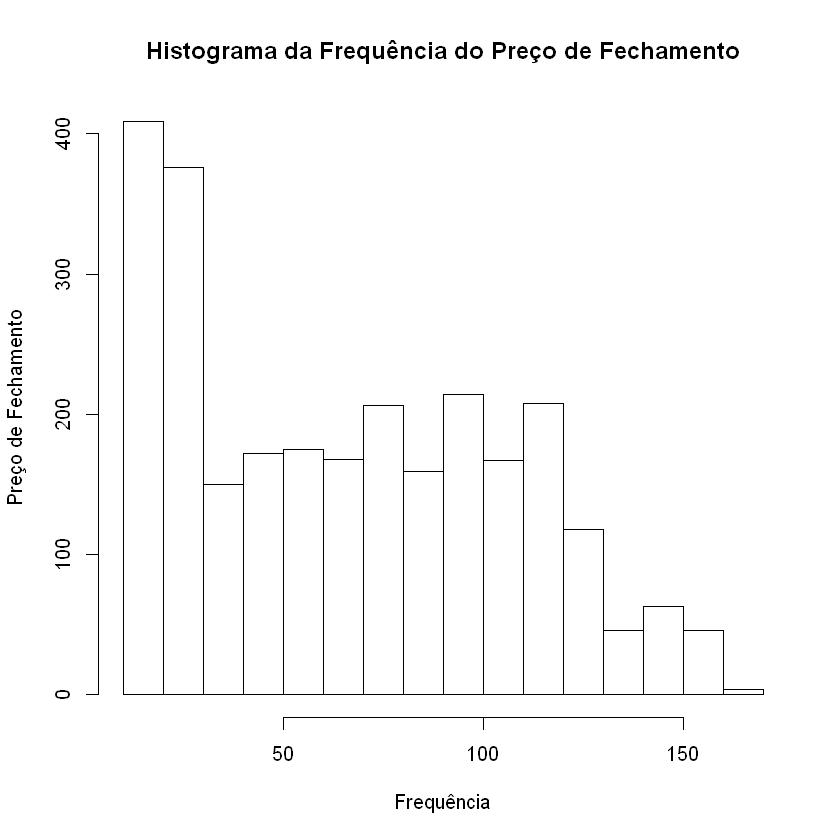

In [35]:
hist(AAPLBD[,"ClosePrice"],main="Histograma da Frequência do Preço de Fechamento",ylab="Preço de Fechamento",xlab="Frequência")


<h3>Gráfico de Dispersão</h3>

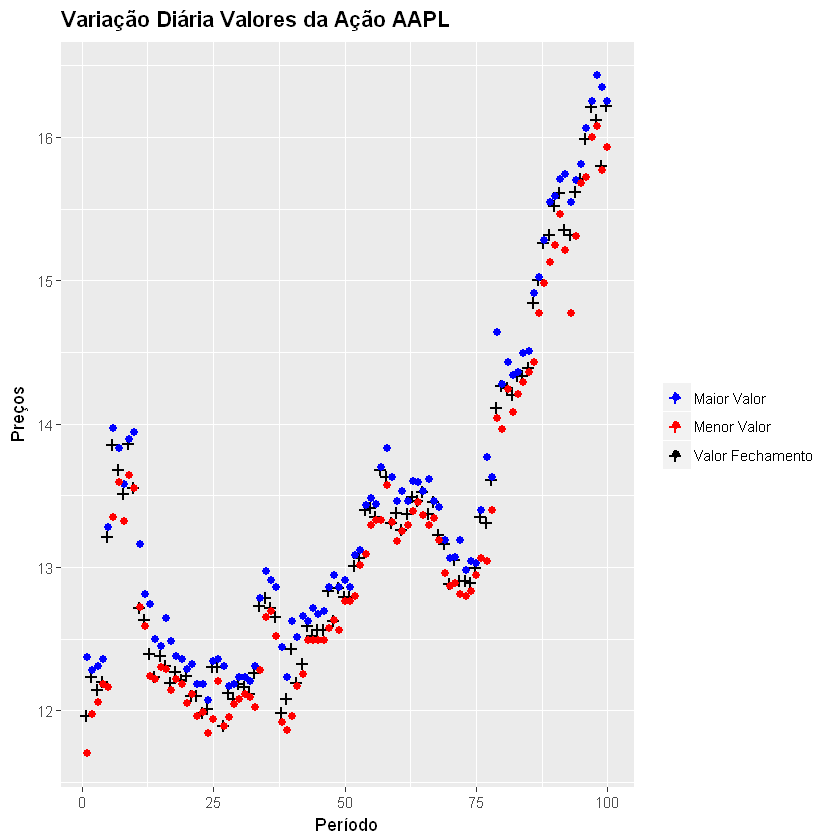

In [39]:

ggplot(AAPLBD[1:100,],aes(Date,ClosePrice)) + xlab("Período")+ylab("Preços")+
  geom_point(aes(color="Valor Fechamento"),shape="+",size=5) +
  geom_point(data=AAPLBD[1:100,],aes(Date,HighPrice,color="Maior Valor"),size=3,shape=20)+
  geom_point(data=AAPLBD[1:100,],aes(Date,LowPrice,color="Menor Valor"),size=3,shape=20)+
  labs(color="Legenda") +
  scale_colour_manual("", breaks = c("Maior Valor", "Menor Valor","Valor Fechamento"),
                      values = c("Blue", "Red","Black")) +
  ggtitle("Variação Diária Valores da Ação AAPL") + 
  theme(plot.title = element_text(lineheight=.7, face="bold"))



<h3>Correlação dos Dados</h3>

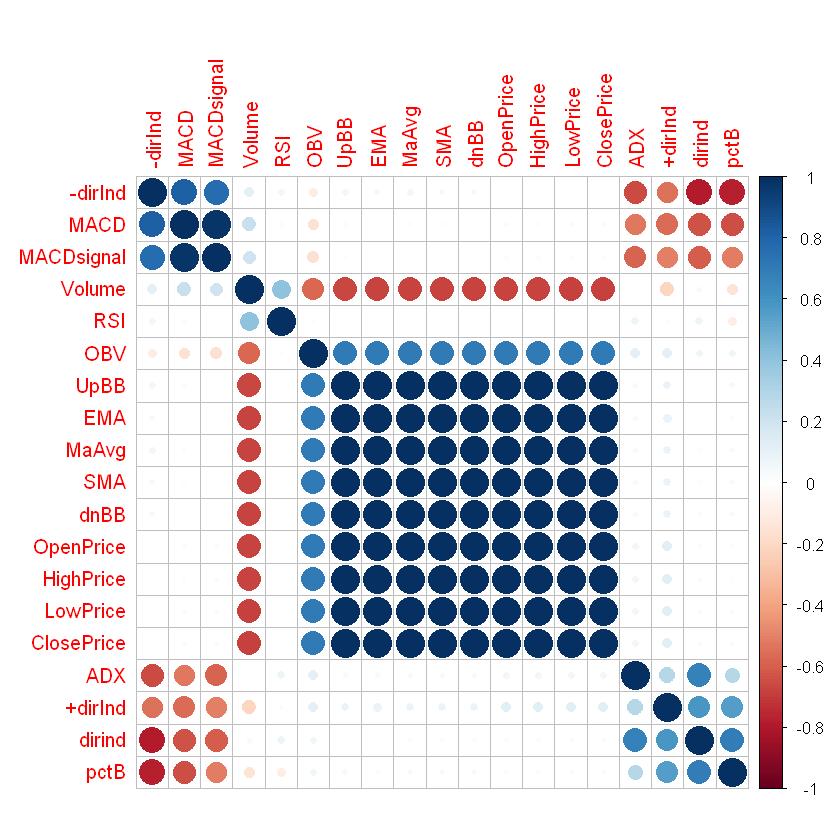

In [65]:
corrplot(correlacoes, order = "hclust")  

<h3>Correlação após redução de dimensionalidade</h3>

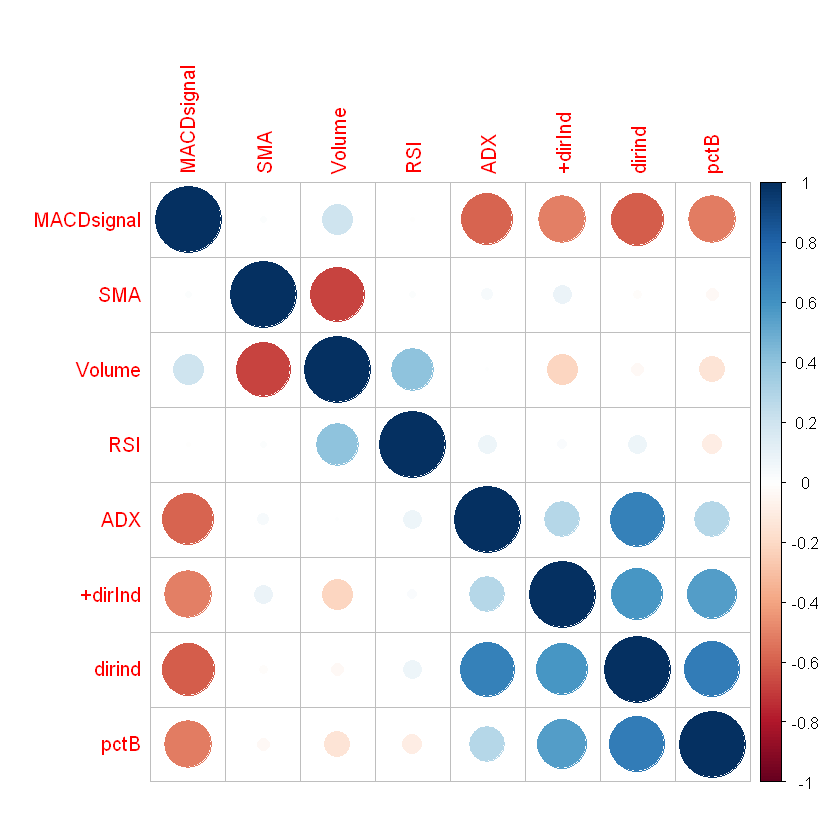

In [68]:
corrplot(cmLimpa, order = "hclust")

<h2>Processo de Mineração</h2>

Para demonstração das funções de mineração utilizadas, será necessário recuperar informações armazenadosmo GitHub, no enderço atribuído à variável data_url.

In [84]:
con <- url("https://github.com/leonardosminfo/stock/raw/master/Fonte.RData")
load(con)

Conjunto de Treino e Teste – 70/30 %


Foi realizada a função de regressão método <i><b>Cubist</b></i>, para os 1775 itens do Dataset, utilizando uma janela deslizante de tamanho fixo (241), com horizonte 20.

In [88]:
CbModel12

Cubist 

1775 samples
   9 predictor

No pre-processing
Resampling: Rolling Forecasting Origin Resampling (20 held-out with a fixed window) 
Summary of sample sizes: 241, 241, 241, 241, 241, 241, ... 
Resampling results across tuning parameters:

  committees  neighbors  RMSE      Rsquared 
    1         0          1.878888  0.7537728
    1         1          1.912226  0.7297393
    1         5          1.878553  0.7514739
    1         9          1.877388  0.7523942
   10         0          1.335045  0.8070565
   10         1          1.368218  0.7879379
   10         5          1.338693  0.8063525
   10         9          1.336566  0.8067927
   50         0          1.279469  0.8245143
   50         1          1.314872  0.8058544
   50         5          1.284360  0.8240985
   50         9          1.281800  0.8243575
  100         0          1.257336  0.8316632
  100         1          1.292913  0.8127304
  100         5          1.261743  0.8308316
  100         9          1.259097

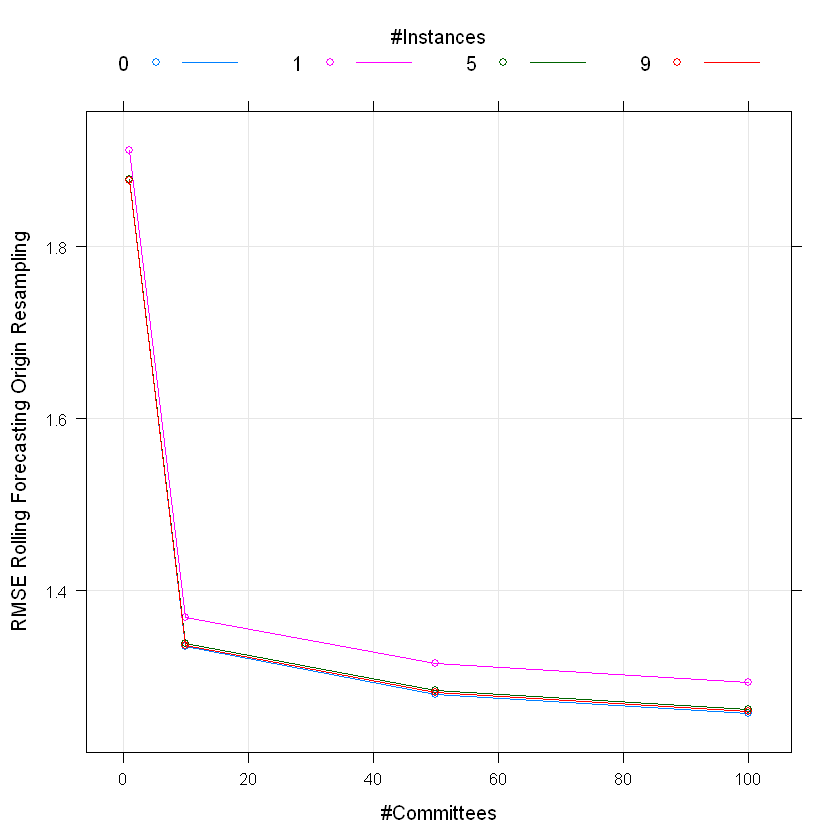

In [93]:
plot(CbModel12)

Em seguida foi realizada, a partir do modelo de regressão gerado, a predição para os próximos 760 períodos.

In [90]:
CubistPredict12[1:20]

[1] 75.55909 73.48251 73.03575 73.77921 71.65740 70.76064 70.99317 70.64111
 [9] 70.70710 71.84258 72.62231 72.70103 72.06194 79.99091 79.38016 80.53329
[17] 81.48917 81.46883 81.25246 81.28709

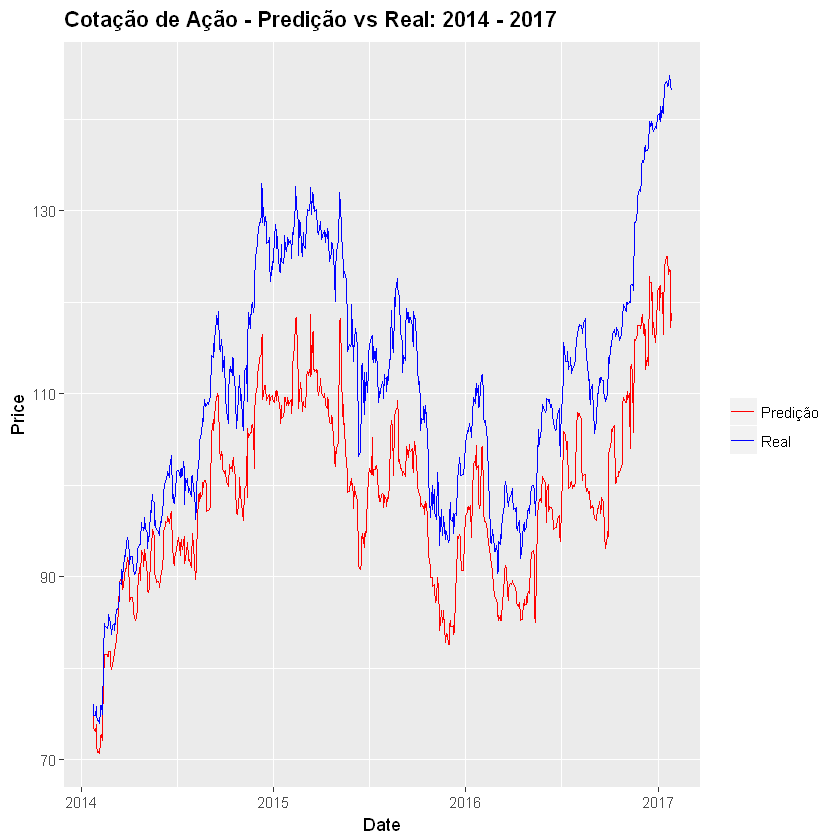

In [98]:
ggplot(tsCubistPredict12,aes(Date,Price)) + 
  geom_line(aes(color="Predição")) +
  geom_line(data=tsoutPrice12,aes(color="Real")) +
  labs(color="Legend") +
  scale_colour_manual("", breaks = c("Predição", "Real"),
                      values = c("red", "blue")) +
  ggtitle("Cotação de Ação - Predição vs Real: 2014 - 2017") + 
  theme(plot.title = element_text(lineheight=.7, face="bold"))

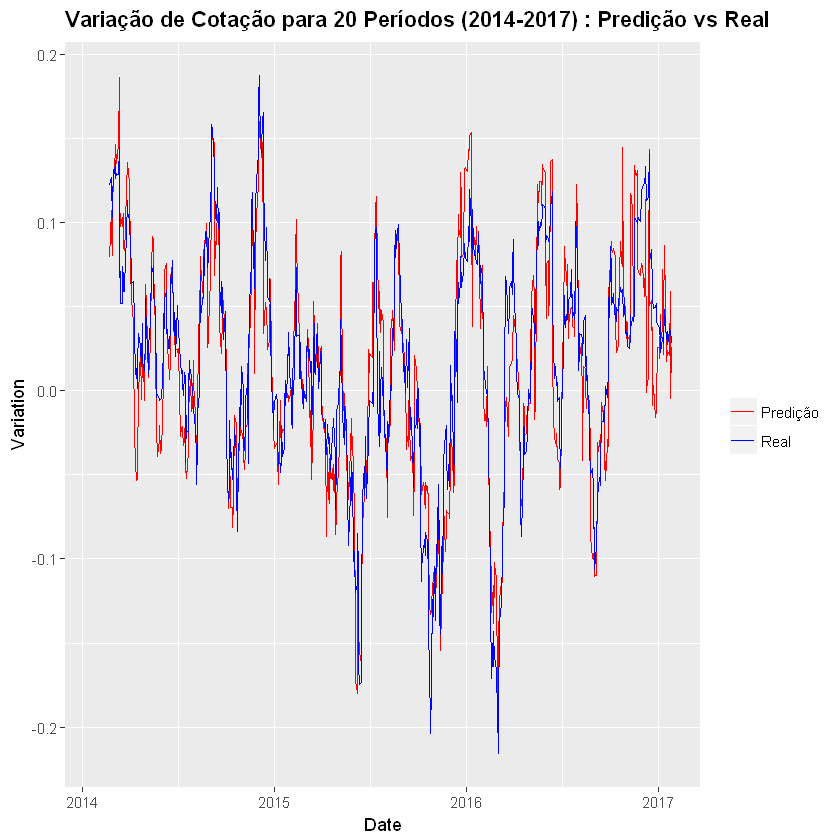

In [97]:

ggplot(tsCubistPredict12,aes(Date,Variation),na.rm=TRUE) + 
  geom_line(aes(color="Predição"),na.rm=TRUE) +
  geom_line(data=tsoutPrice12,aes(color="Real"),na.rm=TRUE) +
  labs(color="Legend") +
  scale_colour_manual("", breaks = c("Predição", "Real"),
                      values = c("red", "blue")) +
  ggtitle("Variação de Cotação para 20 Períodos (2014-2017) : Predição vs Real") + 
  theme(plot.title = element_text(lineheight=.7, face="bold"))

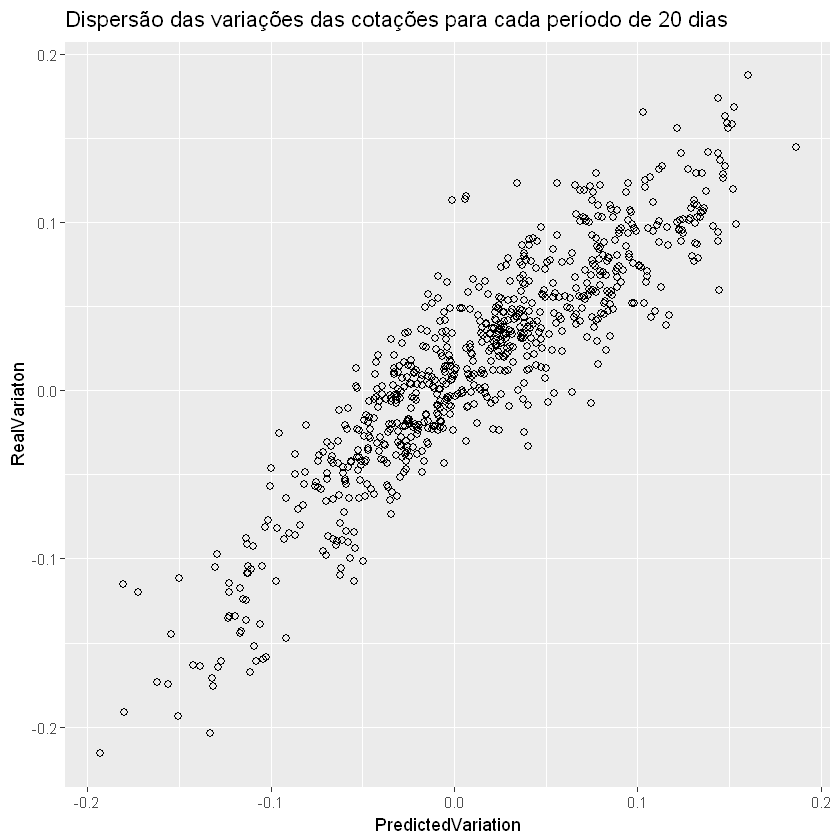

In [144]:
ggplot(subset(tscompare12, !is.na(RealTendence)), 
       aes(PreditectedVariation,RealVariaton),color=c("PredictedVariation","RealVariation"),na.rm=TRUE) +
geom_point(na.rm=TRUE, size=2,shape=21)+
  geom_point(na.rm=TRUE, size=2,shape=21)+
xlab("PredictedVariation")+
ggtitle("Dispersão das variações das cotações para cada período de 20 dias") 

<h2>Classificação</h2>

Foi utilizado o binning como  técnica para classificar os valores de um conjunto em rótulos exclusivos. 
Em vez de representar a diferença dos valores de predição isoladamente, esta técnica possibilitou a rotulagem como etiquetas  Alta, Neutra(Indefinida) e Baixa, conforme tabela a seguir:

<img src="https://github.com/leonardosminfo/Stock/blob/master/tabela_classificacao.png?raw=true"></img>

A função para classificação:

In [123]:

tendenceFunc<-function(x){ 
  
  ifelse(x>0.01,"Alta",ifelse(x<(0.02*-1) ,"Baixa","Neutra"))
  
}

Como resultado, as predições e as cotações reais ficaram classificadas da seguinte forma:

In [124]:
head(tscompare12[-c(1:50),],30)

,Date,PredictedPrice,PreditectedVariation,PredictedTendence,RealPrice,RealVariaton,RealTendence
51,2014-04-04,87.76917,0.0540747500,Alta,92.08,0.064017371,Alta
52,2014-04-07,87.68183,0.0406399814,Alta,92.18,0.064871259,Alta
53,2014-04-08,87.48429,0.0076813826,Neutra,91.86,0.058734943,Alta
54,2014-04-09,86.96114,-0.0055997544,Neutra,90.91,0.046839587,Alta
55,2014-04-10,86.02933,-0.0248338129,Baixa,90.83,0.034725711,Alta
56,2014-04-11,85.55563,-0.0430630199,Baixa,90.28,0.010019008,Neutra
57,2014-04-14,85.21194,-0.0532518862,Baixa,90.36,0.013593524,Neutra
58,2014-04-15,85.48509,-0.0526575714,Baixa,90.90,0.001431167,Neutra
59,2014-04-16,86.50380,-0.0427191505,Baixa,91.98,0.016995091,Neutra
60,2014-04-17,88.45664,-0.0011804981,Neutra,92.93,0.034150194,Alta


A  tabela  abaixo apresenta  a  matriz  de  confusão,  com <b> 77,57%  de  acurácia</b>.  Esta  é  uma  taxa  alta, 
contudo,  é  possível  identificar na decomposição por classes, que a classifação neutra, ainda permite uma grande margem de melhoria.

In [148]:
confusionMatrix(AlgoTRADE12,MarketTRADE12)


Confusion Matrix and Statistics

          Reference
Prediction Alta Baixa Neutra
    Alta    320     4     24
    Baixa     6   176     61
    Neutra   52    19     78

Overall Statistics
                                          
               Accuracy : 0.7757          
                 95% CI : (0.7439, 0.8053)
    No Information Rate : 0.5108          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6423          
 Mcnemar's Test P-Value : 3.609e-07       

Statistics by Class:

                     Class: Alta Class: Baixa Class: Neutra
Sensitivity               0.8466       0.8844        0.4785
Specificity               0.9227       0.8762        0.8769
Pos Pred Value            0.9195       0.7243        0.5235
Neg Pred Value            0.8520       0.9537        0.8562
Prevalence                0.5108       0.2689        0.2203
Detection Rate            0.4324       0.2378        0.1054
Detection Prevalence    

Finalmente, chegamos à definição da tendências de ações, conforme abaixo:

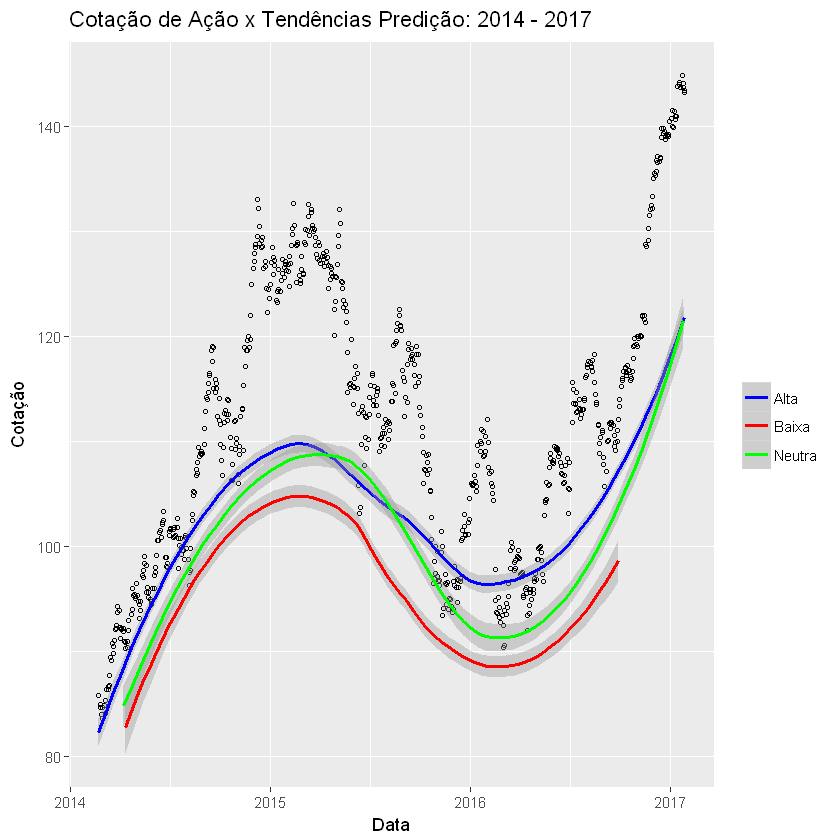

In [121]:

ggplot(subset(tscompare12, !is.na(RealTendence)), aes(Date, RealPrice),na.rm=TRUE) +
  geom_point(na.rm=TRUE, color="black", size=1,shape=21) +
  geom_smooth(data=subset(tscompare12, !is.na(RealTendence)),
              aes(Date,PredictedPrice,color=factor(PredictedTendence)),na.rm=TRUE,method="loess") +
    ggtitle("Cotação de Ação x Tendências Predição: 2014 - 2017") +
  xlab("Data") + ylab("Cotação")+
  labs(color="Tendência")+

  scale_colour_manual("", breaks = c("Alta", "Baixa","Neutra"),
                      values = c("blue", "Red","green")) 